In [34]:
import tensorflow as tf
from tensorflow import  keras
from tensorflow.keras import  layers

import matplotlib.pyplot as plt
%matplotlib inline

# 一个简单的全连接神经网络

In [35]:
# 分如下几个步骤
# 加载数据集
# 构造模型/编译模型
# 训练模型


In [36]:
# 我这里也是加载MNIST数据集吧。
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [37]:
# 构造模型
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),   # 这个先是展平操作
  tf.keras.layers.Dense(128, activation='relu'),   # 全连接层
  tf.keras.layers.Dropout(0.2),                    # 随机丢弃一些数据
  tf.keras.layers.Dense(10, activation='softmax')  # 全连接层，用softmax
])
# 编译模型
model.compile(optimizer='adam',                        # 优化器
              loss='sparse_categorical_crossentropy',  # 损失函数
              metrics=['accuracy'])

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 14s 264us/sample - loss: 0.0290 - accuracy: 0.9900 - val_loss: 0.0300 - val_accuracy: 0.9908
Epoch 2/5
54000/54000 [==============================] - 12s 223us/sample - loss: 0.0291 - accuracy: 0.9901 - val_loss: 0.0352 - val_accuracy: 0.9900
Epoch 3/5
54000/54000 [==============================] - 12s 225us/sample - loss: 0.0270 - accuracy: 0.9904 - val_loss: 0.0319 - val_accuracy: 0.9908
Epoch 4/5
54000/54000 [==============================] - 12s 225us/sample - loss: 0.0257 - accuracy: 0.9909 - val_loss: 0.0341 - val_accuracy: 0.9902
Epoch 5/5
54000/54000 [==============================] - 12s 225us/sample - loss: 0.0264 - accuracy: 0.9907 - val_loss: 0.0330 - val_accuracy: 0.9903
10000/10000 - 1s - loss: 0.0732 - accuracy: 0.9809


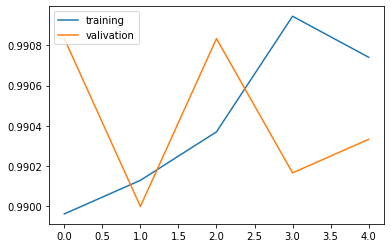

In [54]:
# 训练并验证模型
history =model.fit(x_train, y_train, epochs=5,validation_split=0.1)      # 训练模型，epochs指的就是训练过程中数据将被“轮”多少次
model.evaluate(x_test,  y_test, verbose=2) # 验证模型,verbose = 2 为每个epoch输出一行记录
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'valivation'], loc='upper left')

# 一个简单的卷积神经网络

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 24s 440us/sample - loss: 0.1452 - accuracy: 0.9544 - val_loss: 0.0572 - val_accuracy: 0.9822
Epoch 2/5
54000/54000 [==============================] - 23s 429us/sample - loss: 0.0456 - accuracy: 0.9856 - val_loss: 0.0425 - val_accuracy: 0.9883
Epoch 3/5
54000/54000 [==============================] - 23s 418us/sample - loss: 0.0328 - accuracy: 0.9897 - val_loss: 0.0334 - val_accuracy: 0.9907
Epoch 4/5
54000/54000 [==============================] - 23s 425us/sample - loss: 0.0267 - accuracy: 0.9915 - val_loss: 0.0322 - val_accuracy: 0.9910
Epoch 5/5
54000/54000 [==============================] - 23s 425us/sample - loss: 0.0204 - accuracy: 0.9934 - val_loss: 0.0402 - val_accuracy: 0.9883
10000/10000 - 2s - loss: 0.0337 - accuracy: 0.9896


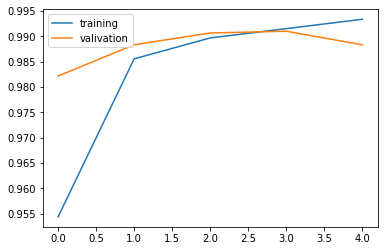

In [55]:
# 这里还是用手写字体来识别吧，不过不同的是，这里换成卷积神经网络。
# 卷积神经网络是用Conv2D这个卷积和MaxPooling2D这个池化来处理数据的。
model_conv2d=tf.keras.models.Sequential([
    # 第1层卷积，卷积核大小为3*3，32个，28*28为待训练图片的大小
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    # 第2层卷积，卷积核大小为3*3，64个
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # 第3层卷积，卷积核大小为3*3，64个
    layers.Conv2D(64, (3, 3), activation='relu'),
    # 展平,原先是矩阵，现在要变成向量
    layers.Flatten(),
    # 如下用2个全连接层
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_conv2d.compile(optimizer='adam',                        # 优化器
              loss='sparse_categorical_crossentropy',  # 损失函数
              metrics=['accuracy'])
# 数据集要更改尺寸,原先是每一个都是28*28的图像，现在要加上一个高度
x_train_2 = x_train.reshape((-1,28,28,1))
x_test_2 = x_test.reshape((-1,28,28,1))
# 我同样训练5次吧
history=model_conv2d.fit(x_train_2, y_train, epochs=5,validation_split=0.1)      # 训练模型，epochs指的就是训练过程中数据将被“轮”多少次
model_conv2d.evaluate(x_test_2,  y_test, verbose=2) # 验证模型,verbose = 2 为每个epoch输出一行记录

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'valivation'], loc='upper left')

# 一个增强的卷积神经网络,深度网络

In [56]:
x_train_2.shape

(60000, 28, 28, 1)

In [57]:
x_train_2_shape = x_train_2.shape
# 相比较卷积神经网络，多了filters，深度啦。
deep_model = keras.Sequential(
[
    layers.Conv2D(input_shape=((x_train_2_shape[1], x_train_2_shape[2], x_train_2_shape[3])),  # 自动根据输入的尺寸
                 filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])

deep_model.compile(optimizer=keras.optimizers.Adam(),
             loss=keras.losses.SparseCategoricalCrossentropy(),
            metrics=['accuracy'])
deep_model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 1568)            

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 41s 753us/sample - loss: 0.0161 - accuracy: 0.9951 - val_loss: 0.0169 - val_accuracy: 0.9947
Epoch 2/5
54000/54000 [==============================] - 39s 718us/sample - loss: 0.0157 - accuracy: 0.9946 - val_loss: 0.0219 - val_accuracy: 0.9935
Epoch 3/5
54000/54000 [==============================] - 36s 672us/sample - loss: 0.0106 - accuracy: 0.9964 - val_loss: 0.0225 - val_accuracy: 0.9947
Epoch 4/5
54000/54000 [==============================] - 37s 687us/sample - loss: 0.0099 - accuracy: 0.9966 - val_loss: 0.0265 - val_accuracy: 0.9930
Epoch 5/5
54000/54000 [==============================] - 34s 624us/sample - loss: 0.0101 - accuracy: 0.9969 - val_loss: 0.0237 - val_accuracy: 0.9932
10000/10000 - 3s - loss: 0.0335 - accuracy: 0.9906


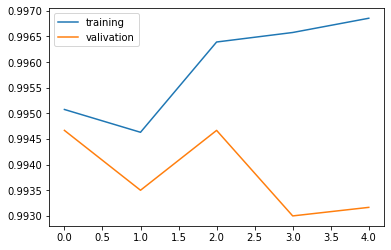

In [59]:
# 训练并验证模型
history = deep_model.fit(x_train_2, y_train, epochs=5,validation_split=0.1)      # 训练模型，epochs指的就是训练过程中数据将被“轮”多少次
deep_model.evaluate(x_test_2,  y_test, verbose=2) # 验证模型,verbose = 2 为每个epoch输出一行记录
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'valivation'], loc='upper left')